In [1]:
import cv2
import numpy as np

def load_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    return image

def linear_transformation(image, a=1, b=0):
    return cv2.convertScaleAbs(image, alpha=a, beta=b)

def logarithmic_transformation(image, c=255):
    image_log = c * np.log1p(image)
    image_log = np.array(image_log, dtype=np.uint8)
    return image_log

def exponential_transformation(image, c=1, k=1):
    image_exp = c * np.exp(k * image / 255)
    image_exp = np.clip(image_exp, 0, 255).astype(np.uint8)
    return image_exp

def power_law_transformation(image, c=1, gamma=0.7):
    image_pow = c * (image / 255.0) ** gamma
    image_pow = np.clip(image_pow * 255, 0, 255).astype(np.uint8)
    return image_pow

def calculate_rms(original, transformed):
    return np.sqrt(np.mean((original.astype(np.float32) - transformed.astype(np.float32)) ** 2))

# Example usage
if __name__ == "__main__":
    for i in range(1, 301):
        input_image_path = f'cloudy_bl{i}.jpg'  # Path to the resized images
        
        # Load the image
        original_image = load_image(input_image_path)

        # Apply transformations
        linear_image = linear_transformation(original_image, a=1.2, b=10)  # Example parameters
        log_image = logarithmic_transformation(original_image)
        exp_image = exponential_transformation(original_image, k=0.1)
        power_law_image = power_law_transformation(original_image, gamma=2.2)

        # Calculate RMS errors
        rms_linear = calculate_rms(original_image, linear_image)
        rms_log = calculate_rms(original_image, log_image)
        rms_exp = calculate_rms(original_image, exp_image)
        rms_power_law = calculate_rms(original_image, power_law_image)

        print(f"RMS Error for Image {i}:")
        print(f"Linear Transformation: {rms_linear:.2f}")
        print(f"Logarithmic Transformation: {rms_log:.2f}")
        print(f"Exponential Transformation: {rms_exp:.2f}")
        print(f"Power Law Transformation: {rms_power_law:.2f}")

        # Save transformed images
        cv2.imwrite(f'trans_linear/linear_transformed_{i}.jpg', linear_image)
        cv2.imwrite(f'trans_log/log_transformed_{i}.jpg', log_image)
        cv2.imwrite(f'trans_exp/exp_transformed_{i}.jpg', exp_image)
        cv2.imwrite(f'trans_power/power_law_transformed_{i}.jpg', power_law_image)


RMS Error for Image 1:
Linear Transformation: 30.84
Logarithmic Transformation: 103.26
Exponential Transformation: 115.09
Power Law Transformation: 58.42
RMS Error for Image 2:
Linear Transformation: 35.84
Logarithmic Transformation: 109.05
Exponential Transformation: 145.83
Power Law Transformation: 60.14
RMS Error for Image 3:
Linear Transformation: 30.54
Logarithmic Transformation: 99.63
Exponential Transformation: 112.36
Power Law Transformation: 59.31
RMS Error for Image 4:
Linear Transformation: 36.71
Logarithmic Transformation: 112.08
Exponential Transformation: 157.15
Power Law Transformation: 62.20
RMS Error for Image 5:
Linear Transformation: 36.48
Logarithmic Transformation: 113.49
Exponential Transformation: 138.28
Power Law Transformation: 60.98
RMS Error for Image 6:
Linear Transformation: 30.32
Logarithmic Transformation: 92.56
Exponential Transformation: 114.96
Power Law Transformation: 58.98
RMS Error for Image 7:
Linear Transformation: 32.08
Logarithmic Transformation

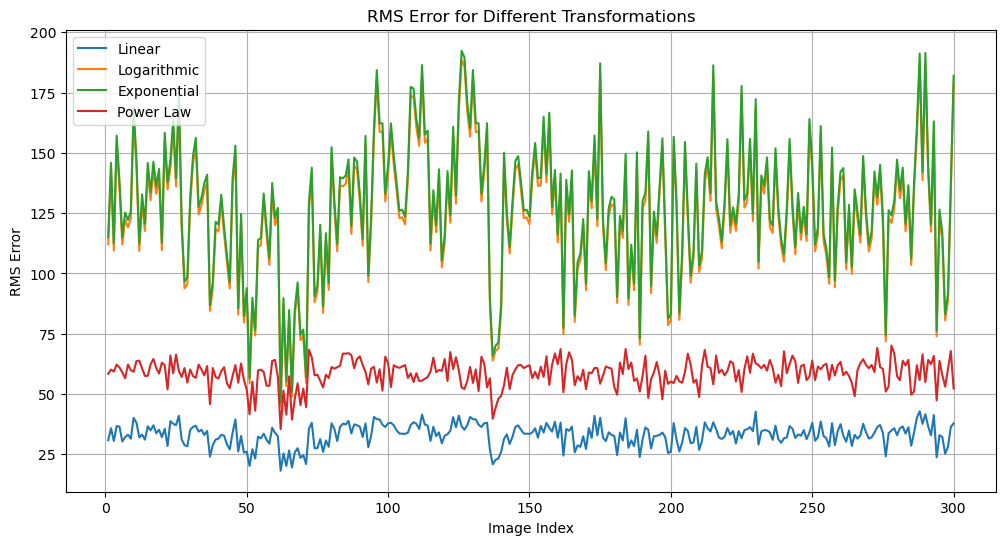

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    return image

def linear_transformation(image, a=1, b=0):
    return cv2.convertScaleAbs(image, alpha=a, beta=b)

def logarithmic_transformation(image, c=1):
    image_log = c * np.log1p(image)
    image_log = np.array(image_log, dtype=np.uint8)
    return image_log

def exponential_transformation(image, c=1, k=1):
    image_exp = c * np.exp(k * image / 255)
    image_exp = np.clip(image_exp, 0, 255).astype(np.uint8)
    return image_exp

def power_law_transformation(image, c=1, gamma=0.7):
    image_pow = c * (image / 255.0) ** gamma
    image_pow = np.clip(image_pow * 255, 0, 255).astype(np.uint8)
    return image_pow

def calculate_rms(original, transformed):
    return np.sqrt(np.mean((original.astype(np.float32) - transformed.astype(np.float32)) ** 2))

# Example usage
if __name__ == "__main__":
    rms_values = {
        "Linear": [],
        "Logarithmic": [],
        "Exponential": [],
        "Power Law": []
    }

    for i in range(1, 301):
        input_image_path = f'cloudy_bl{i}.jpg'  # Path to the resized images
        
        # Load the image
        original_image = load_image(input_image_path)

        # Apply transformations
        linear_image = linear_transformation(original_image, a=1.2, b=10)  # Example parameters
        log_image = logarithmic_transformation(original_image)
        exp_image = exponential_transformation(original_image, k=0.1)
        power_law_image = power_law_transformation(original_image, gamma=2.2)

        # Calculate RMS errors
        rms_linear = calculate_rms(original_image, linear_image)
        rms_log = calculate_rms(original_image, log_image)
        rms_exp = calculate_rms(original_image, exp_image)
        rms_power_law = calculate_rms(original_image, power_law_image)

        # Store RMS values
        rms_values["Linear"].append(rms_linear)
        rms_values["Logarithmic"].append(rms_log)
        rms_values["Exponential"].append(rms_exp)
        rms_values["Power Law"].append(rms_power_law)

        # Save transformed images
        cv2.imwrite(f'linear_transformed_{i}.jpg', linear_image)
        cv2.imwrite(f'log_transformed_{i}.jpg', log_image)
        cv2.imwrite(f'exp_transformed_{i}.jpg', exp_image)
        cv2.imwrite(f'power_law_transformed_{i}.jpg', power_law_image)

    # Plotting RMS values
    plt.figure(figsize=(12, 6))
    for transformation, rms in rms_values.items():
        plt.plot(range(1, 301), rms, label=transformation)

    plt.title('RMS Error for Different Transformations')
    plt.xlabel('Image Index')
    plt.ylabel('RMS Error')
    plt.legend()
    plt.grid()
    plt.show()
